# Cтруктура программы на Python для классификации данных методом логистической регрессии

## Импортировать необходимые библиотеки:

In [1]:
## Импортировать необходимые библиотеки:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

## Загрузить данные 

In [2]:
# Загрузить данные с помощью numpy:

# data = np.loadtxt('C:/Users/user/Desktop/titanic.csv', delimiter=',')
# y = data[:, 0]
# X = data[:, 1:]

In [2]:
# Загрузить данные с помощью pandas:
df = pd.read_csv("C:/Users/user/Desktop/titanic.csv", delimiter=',')

## Определить целевую переменную

In [3]:
# целевую переменную 'Survived' перенесли вправо
df1 = df.drop(labels = ['Survived'], axis = 1)
df1['Survived'] = df['Survived']
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## Оцифровка данных и заполнение пропусков

In [4]:
# посмотрели 1) какие типы данных есть в колонках датафрейма и  2) сколько в колонках пропусков
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dict(df1.dtypes)

{'PassengerId': dtype('int64'),
 'Pclass': dtype('int64'),
 'Name': dtype('O'),
 'Sex': dtype('O'),
 'Age': dtype('float64'),
 'SibSp': dtype('int64'),
 'Parch': dtype('int64'),
 'Ticket': dtype('O'),
 'Fare': dtype('float64'),
 'Cabin': dtype('O'),
 'Embarked': dtype('O'),
 'Survived': dtype('int64')}

In [6]:
# отбор всех колонок, содержащих числовые значения (вариант1)
dct_types = dict(df1.dtypes)
list_num_colomns = [elem for elem in dct_types.keys() if 'object' not in str(dct_types[elem])]
list_num_colomns

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

In [7]:
# отбор колонок, содержащих числовые значения (вариант2)
numeric_cols = df1.select_dtypes(include=['number']).columns
numeric_cols

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'], dtype='object')

In [8]:
# Новый датафрейм, содержащий исключительно числвые данные
df1 = df1[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,1,3,22.0,1,0,7.2500,0
1,2,1,38.0,1,0,71.2833,1
2,3,3,26.0,0,0,7.9250,1
3,4,1,35.0,1,0,53.1000,1
4,5,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0
887,888,1,19.0,0,0,30.0000,1
888,889,3,NaN,1,2,23.4500,0
889,890,1,26.0,0,0,30.0000,1


In [9]:
# как мы видим только возраст имеет пропуски
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Survived     891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [10]:
# построим  датафрейм без пропусков в возрасте, 
# чтобы возраст сделать - промежуточной целевой переменной и 
# построить регрессор для 'умного' восстановления пропусков

df2 = df1[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']]
df3 = df2.dropna()
df3

,PassengerId,Pclass,SibSp,Parch,Fare,Age
0,1,3,1,0,7.2500,22.0
1,2,1,1,0,71.2833,38.0
2,3,3,0,0,7.9250,26.0
3,4,1,1,0,53.1000,35.0
4,5,3,0,0,8.0500,35.0
...,...,...,...,...,...,...
885,886,3,0,5,29.1250,39.0
886,887,2,0,0,13.0000,27.0
887,888,1,0,0,30.0000,19.0
889,890,1,0,0,30.0000,26.0


In [11]:
# какой разброс у  возраст в 3 классе с ценой больше 50
df2[(df2['Fare'] > 50) & (df2['Pclass'] == 3)]

,PassengerId,Pclass,SibSp,Parch,Fare,Age
74,75,3,0,0,56.4958,32.0
159,160,3,8,2,69.5500,NaN
169,170,3,0,0,56.4958,28.0
180,181,3,8,2,69.5500,NaN
201,202,3,8,2,69.5500,NaN
324,325,3,8,2,69.5500,NaN
509,510,3,0,0,56.4958,26.0
643,644,3,0,0,56.4958,NaN
692,693,3,0,0,56.4958,NaN
792,793,3,8,2,69.5500,NaN


In [12]:
# из датафрейма df2 выделяю строки с пропусками в колонке возраст, чтобы их востановить регрессором
df2['Age_NaN'] = np.where(df2['Age'].isnull(), 0,1)
df2_Age_NaN = df2[df2['Age_NaN'] == 0][['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare']]
df2_Age_NaN

,PassengerId,Pclass,SibSp,Parch,Fare
5,6,3,0,0,8.4583
17,18,2,0,0,13.0000
19,20,3,0,0,7.2250
26,27,3,0,0,7.2250
28,29,3,0,0,7.8792
...,...,...,...,...,...
859,860,3,0,0,7.2292
863,864,3,8,2,69.5500
868,869,3,0,0,9.5000
878,879,3,0,0,7.8958


In [22]:
# построили оценьщик с помощью регрессора sklearn
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

# данные
y = df3['Age'] # метка или  целевая переменная
X = df3[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare']] # предикторы
#Создать объект модели:

model = LinearRegression()
model1 = XGBRegressor()

#Обучить модель на данных:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
model.fit(X_train, y_train)
model1.fit(X_train, y_train)

#Оценить качество модели на тестовых данных:

y_pred = model.predict(X_test) 
y_pred1 = model1.predict(X_test) 
mse = mean_squared_error(y_test, y_pred) 
print(f"Mean squared error LinearRegression: {mse:.4f}")
mse1 = mean_squared_error(y_test, y_pred1) 
print(f"Mean squared error XGBRegressor: {mse1:.4f}")

Mean squared error LinearRegression: 134.7013
Mean squared error XGBRegressor: 171.9975


In [28]:
df2_Age_NaN.iloc[:,:-1]

,PassengerId,Pclass,SibSp,Parch,Fare
5,6,3,0,0,8.4583
17,18,2,0,0,13.0000
19,20,3,0,0,7.2250
26,27,3,0,0,7.2250
28,29,3,0,0,7.8792
...,...,...,...,...,...
859,860,3,0,0,7.2292
863,864,3,8,2,69.5500
868,869,3,0,0,9.5000
878,879,3,0,0,7.8958


In [29]:
# прогноз для пропущенныз значений возраста
y_pred_Age_NaN = model1.predict(df2_Age_NaN.iloc[:,:-1]) 
df2_Age_NaN['Age'] = y_pred_Age_NaN
df2_Age_NaN

,PassengerId,Pclass,SibSp,Parch,Fare,Age
5,6,3,0,0,8.4583,31.069654
17,18,2,0,0,13.0000,42.986008
19,20,3,0,0,7.2250,21.566534
26,27,3,0,0,7.2250,23.395750
28,29,3,0,0,7.8792,21.643959
...,...,...,...,...,...,...
859,860,3,0,0,7.2292,39.400345
863,864,3,8,2,69.5500,12.075275
868,869,3,0,0,9.5000,32.312416
878,879,3,0,0,7.8958,22.727283


In [33]:
df2_Age_NaN['Age'].agg(['min','max','mean','std'])

min     -0.388112
max     66.995522
mean    29.943119
std     12.157984
Name: Age, dtype: float64

<AxesSubplot:>

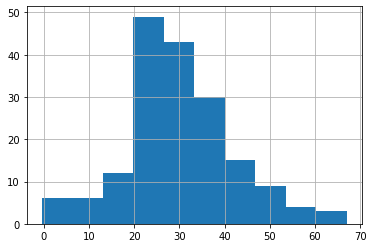

In [31]:
df2_Age_NaN['Age'].hist()

In [32]:
# вычислили среднее значение
df1['Age'].min()

0.42

In [47]:
# Заполняем пропущенные значения средним
# df1 = df1.fillna(df1['Age'].mean())
np.random.normal(29.943119, 12.157984, 1)[0]

28.120430923814233

In [66]:
# Заполняем пропуски значением случайной величины с 
# нормальным распределением с параметрами: (mean = 29.943119, std = 12.157984)
#df4 = df2.fillna(np.random.normal(29.943119, 12.157984, 1)[0]) 

# равномерным распределением с параметрами: (meшт = 0.42, max = 60.157984)
df4 = df2.fillna(np.random.uniform(0.42, 60.157984, 1)[0]) 
df4 = df4[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age']]
df4

,PassengerId,Pclass,SibSp,Parch,Fare,Age
0,1,3,1,0,7.2500,22.000000
1,2,1,1,0,71.2833,38.000000
2,3,3,0,0,7.9250,26.000000
3,4,1,1,0,53.1000,35.000000
4,5,3,0,0,8.0500,35.000000
...,...,...,...,...,...,...
886,887,2,0,0,13.0000,27.000000
887,888,1,0,0,30.0000,19.000000
888,889,3,1,2,23.4500,14.143809
889,890,1,0,0,30.0000,26.000000


In [67]:
# Посмотрим информацию по содержанию колонок обновленного датафрейма
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Age          891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


## Разделить данные на предикторы и целевую переменную

In [68]:
y = df1['Survived'] # метка или  целевая переменная
X = df4 # предикторы

## Разделить данные на обучающую и тестовую выборки:

In [69]:
# Разделить данные на обучающую и тестовую выборки:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Вибираем и обучаем модель классификации

В библиотеке scikit-learn существует множество классификаторов, которые можно использовать для решения задач классификации. Некоторые из них:

- Логистическая регрессия (Logistic Regression) - линейный классификатор, который использует логистическую функцию для вычисления вероятности принадлежности точки к определенному классу.
- Наивный байесовский классификатор (Naive Bayes) - классификатор, основанный на теореме Байеса, который считает, что признаки независимых переменных независимы друг от друга.
- Случайный лес (Random Forest) - ансамблевый классификатор, который объединяет множество деревьев решений для повышения точности классификации.
- Градиентный бустинг (Gradient Boosting) - метод машинного обучения, который строит последовательность решающих деревьев, используя градиентный спуск для оптимизации ошибки.
- K-ближайших соседей (K-Nearest Neighbors) - классификатор, который находит ближайший класс для каждой точки данных на основе расстояния между точками.
- Многослойный перцептрон (Multi-layer Perceptron) - нейронная сеть с несколькими скрытыми слоями, которая используется для решения задач распознавания образов и классификации.


Здесь будем использовать логистическую регрессию

# У каждой модели есть Гиперпараметры

In [62]:
# Выбираем гиперпараметры для логистической регрессии
# params = {
#     'C': [1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['newton-cg', 'liblinear', 'sag', 'saga']}

Для настройки гиперпараметров логистической регрессии можно использовать метод GridSearchCV из библиотеки scikit-learn.

In [16]:
# from sklearn.model_selection import GridSearchCV

In [88]:
# Обучить модель без настройки гиперпарамтеров:

regressor = LogisticRegression(penalty='l2', solver='newton-cholesky', max_iter=300) #'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'
regressor.fit(X_train, y_train)

LogisticRegression(max_iter=300, solver='newton-cholesky')

In [78]:
# # Готовим объект модели
# model = LogisticRegression()
# # Запускаем GridSearchCV для нстройик параметров
# # логистической регрессии и сохраняем результаты
# grid = GridSearchCV(model, params, cv=5)
# grid_result = grid.fit(X, y)

## Делаем предсказания на тестовой выборке

In [89]:
# Считаем прогноз для тестовой выборки:

y_pred = regressor.predict(X_test)

## Оценить качество прогноза модели

In [90]:
# Оценить качество прогноза модели:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7262569832402235


In [63]:
# print("Результаты GridSearchCV:")
# for param_name, param_value in zip(grid.best_params_, grid.best_score_):
#     print(param_name + ": " + str(param_value))

# Сравним с предсказаниями других классификаторов

In [77]:
import numpy as np


#----------classifyers--------------------------------------------------
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#----------classifyers--------------------------------------------------

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "Quadratic Discriminant Analysis (QDA)",
]

classifiers = [
    LogisticRegression(max_iter=300),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'{name}: {score}')
    print('======================================================')    

Logistic Regression: 0.7262569832402235
Nearest Neighbors: 0.6759776536312849
Linear SVM: 0.6983240223463687
RBF SVM: 0.6927374301675978
Gaussian Process: 0.7541899441340782
Decision Tree: 0.7039106145251397
Random Forest: 0.7430167597765364
Neural Net: 0.7653631284916201
AdaBoost: 0.7374301675977654
Naive Bayes: 0.6983240223463687
Quadratic Discriminant Analysis (QDA): 0.7597765363128491
